<a href="https://colab.research.google.com/github/Junhojuno/tensorflow-tutorial-with-colab/blob/master/1.mlp_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [0]:
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("train_images.shape : ", train_images.shape)
print("train_labels.shape : ", train_labels.shape)
print("test_images.shape : ", test_images.shape)
print("test_labels.shape : ", test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
train_images.shape :  (60000, 28, 28)
train_labels.shape :  (60000,)
test_images.shape :  (10000, 28, 28)
test_labels.shape :  (10000,)


```
0 - T-shirt/Top <br>
1 - trouser(바지) <br>
2 - pullover (집업긴팔, 집업후드느낌) <br>
3 - dress <br>
4 - coat <br>
5 - sandal <br>
6 - shirt <br>
7 - sneakers <br>
8 - bag <br>
9 - ankle boots <br>
```

In [0]:
class_names = ["T-shirt/Top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boots"]

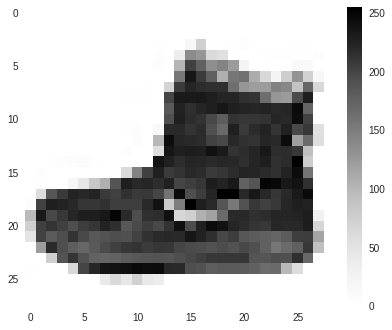

In [7]:
# plot the image
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# neural network에 넣기전에 0~1사이의 값으로 바꿔주자
train_images = train_images / 255.
test_images = test_images / 255.

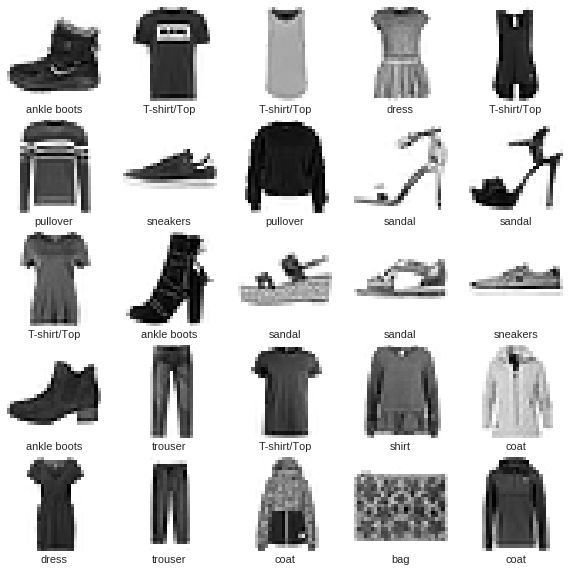

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
from tensorflow import keras

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.4953 - acc: 0.8259
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3745 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3352 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3133 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2939 - acc: 0.8897
Epoch 6/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2811 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2661 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2563 - acc: 0.9040
Epoch 9/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2469 - acc: 0.9076
Epoch 10/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2375 - acc: 0.9109

In [14]:
# evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy : ", test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy :  0.8838


In [0]:
# make predictions
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([4.7493614e-08, 9.3588226e-10, 3.6088448e-09, 1.5034280e-07,
       3.5252727e-09, 2.5287701e-03, 2.3217549e-08, 2.3779405e-02,
       2.5602416e-08, 9.7369158e-01], dtype=float32)

In [20]:
import numpy as np
print(np.argmax(predictions[0]), test_labels[0])

9 9


In [0]:
# plot the prediction (acc)